In [6]:
pip install -U finance-datareader

In [7]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [10]:
import FinanceDataReader as fdr
fdr.DataReader('005390', start = '2015', end = '2024')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,1360,1375,1340,1370,681812,0.007353
2015-01-05,1365,1380,1335,1380,834876,0.007299
2015-01-06,1370,1385,1350,1360,445431,-0.014493
2015-01-07,1360,1370,1305,1310,1037801,-0.036765
2015-01-08,1310,1335,1305,1320,529128,0.007634
...,...,...,...,...,...,...
2023-12-21,1865,1872,1847,1864,239985,-0.000536
2023-12-22,1857,1867,1785,1810,959494,-0.028970
2023-12-26,1808,1833,1808,1832,416410,0.012155


In [43]:
df = fdr.DataReader('005930', start = '2020' ).reset_index()

In [44]:
df

,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...,...
983,2023-12-22,75800,76300,75400,75900,14515608,0.012000
984,2023-12-26,76100,76700,75700,76600,13164909,0.009223
985,2023-12-27,76700,78000,76500,78000,20651042,0.018277
986,2023-12-28,77700,78500,77500,78500,17797536,0.006410


In [45]:
def add_bollinger_bands(df, window=20, num_std=2):
    # 10일 이동평균
    df['MA10'] = df['Close'].rolling(window=10).mean()

    # 볼린저 밴드 상단, 중간, 하단 계산
    df['UpperBand'] = df['MA10'] + (df['Close'].rolling(window=window).std() * num_std)
    df['MiddleBand'] = df['MA10']
    df['LowerBand'] = df['MA10'] - (df['Close'].rolling(window=window).std() * num_std)

    return df
# 볼린저 밴드와 이동평균 추가
df = add_bollinger_bands(df)

# 결과 확인
print(df.head(20))

         Date   Open   High    Low  Close    Volume    Change     MA10  \
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753      NaN   
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435      NaN   
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000      NaN   
3  2020-01-07  55700  56400  55600  55800  10009778  0.005405      NaN   
4  2020-01-08  56200  57400  55900  56800  23501171  0.017921      NaN   
5  2020-01-09  58400  58600  57400  58600  24102579  0.031690      NaN   
6  2020-01-10  58800  59700  58300  59500  16000170  0.015358      NaN   
7  2020-01-13  59600  60000  59100  60000  11359139  0.008403      NaN   
8  2020-01-14  60400  61000  59900  60000  16906295  0.000000      NaN   
9  2020-01-15  59500  59600  58900  59000  14300928 -0.016667  57590.0   
10 2020-01-16  59100  60700  59000  60700  14381774  0.028814  58140.0   
11 2020-01-17  61900  62000  61000  61300  16025661  0.009885  58720.0   
12 2020-01-20  62000  62800  61700  62

In [ ]:
#멀티프로X

In [14]:
from tqdm import tqdm
import time
start_time = time.time()

merge_stock_list =[]
for code in tqdm(code_list): # code_list는 1,890개의 종목 코드가 담긴 리스트입니다.
    stock_list = fdr.DataReader(code, '2017').reset_index().values.tolist() # fdr로 불러온 주가 데이터프레임을 리스트로 변형

    for row in stock_list:                   # 불러온 주가 데이터를 1줄씩 불러옴
        row.append(code)                      # 주가 데이터에 기업 코드를 추가
        merge_stock_list.append(row)          # 모든 기업의 데이터를 병합

end_time = time.time()
print('--- 걸린시간: {} ---'.format(end_time - start_time))

  1%|▏         | 27/1833 [00:38<42:49,  1.42s/it]


KeyboardInterrupt: ignored

In [ ]:
#삼성전자 예측

In [15]:
import multiprocessing
multiprocessing.cpu_count()

2

In [17]:
def merging_stock_data(code):

    merge_stock_list =[]
    stock_list = fdr.DataReader(code, '2017').reset_index().values.tolist()
    for row in stock_list:                                # 불러온 주가 데이터를 1줄씩 불러옴
        row.append(code)                                  # 주가 데이터에 기업 코드를 추가
        merge_stock_list.append(row)                      # 모든 기업의 데이터를 병합

    return merge_stock_list

In [18]:
from multiprocessing import Pool
import time
start_time = time.time()
result=[]

#### 멀티 프로세싱 ####
p = Pool(20) # 몇개의 코어를 이용할 것인지 설정
for row in p.map(merging_stock_data, code_list): # 각 코어에 입력값들을 병렬 처리
    result+=row
p.close() # 멀티 프로세싱 종료
p.join()

end_time = time.time()
print('--- 걸린시간: {} ---'.format(end_time - start_time))

--- 걸린시간: 158.4871323108673 ---


In [21]:
p

<multiprocessing.pool.Pool state=CLOSE pool_size=20>

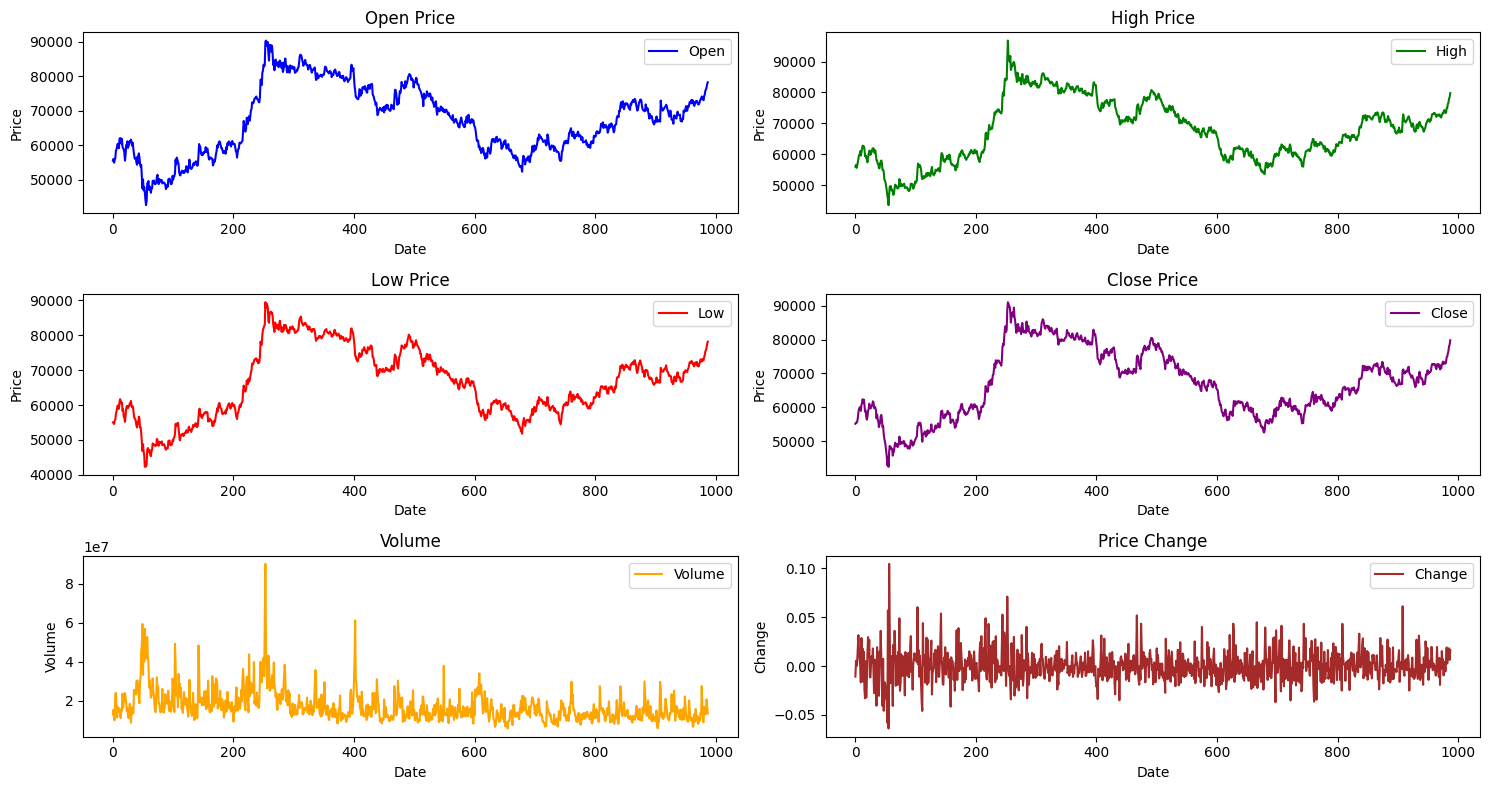

In [49]:
import matplotlib.pyplot as plt


# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
plt.plot(df.index, df['Open'], label='Open', color='blue')
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df.index, df['High'], label='High', color='green')
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df.index, df['Close'], label='Close', color='purple')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df.index, df['Volume'], label='Volume', color='orange')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df.index, df['Change'], label='Change', color='brown')
plt.title('Price Change')
plt.xlabel('Date')
plt.ylabel('Change')
plt.legend()


plt.tight_layout()
plt.show()

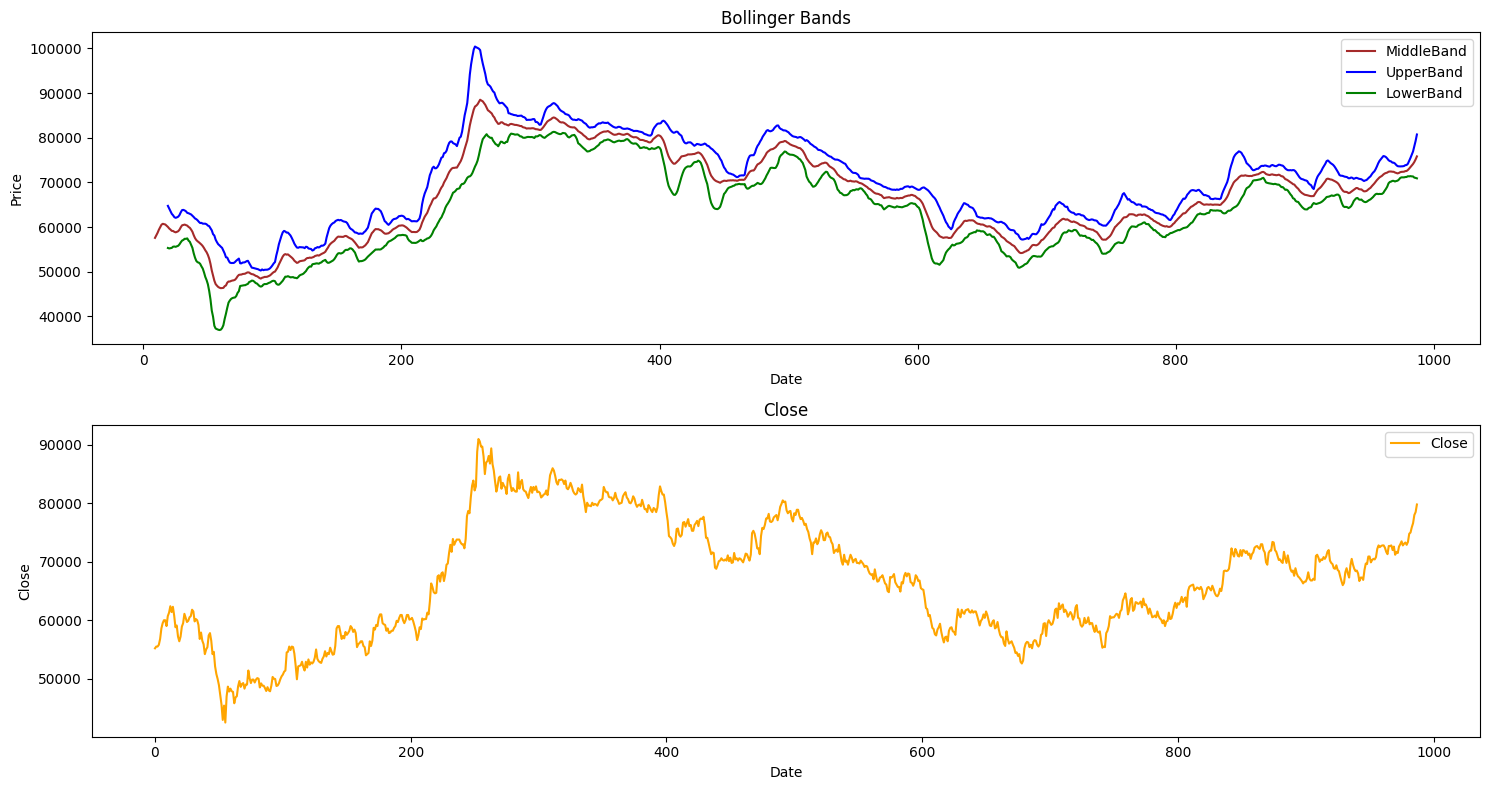

In [52]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['MiddleBand'], label='MiddleBand', color='brown')
plt.plot(df.index, df['UpperBand'], label='UpperBand', color='blue')
plt.plot(df.index, df['LowerBand'], label='LowerBand', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Close'], label='Close', color='orange')
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 0.1837 - val_loss: 0.0919
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 0.0188 - val_loss: 0.0082
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 8.9221e-04
Epoch 5/50
30/30 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/50
30/30 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 8.6771e-04
Epoch 9/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 9.8000e-04
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Ep

2/2 [==============================] - 0s 6ms/step


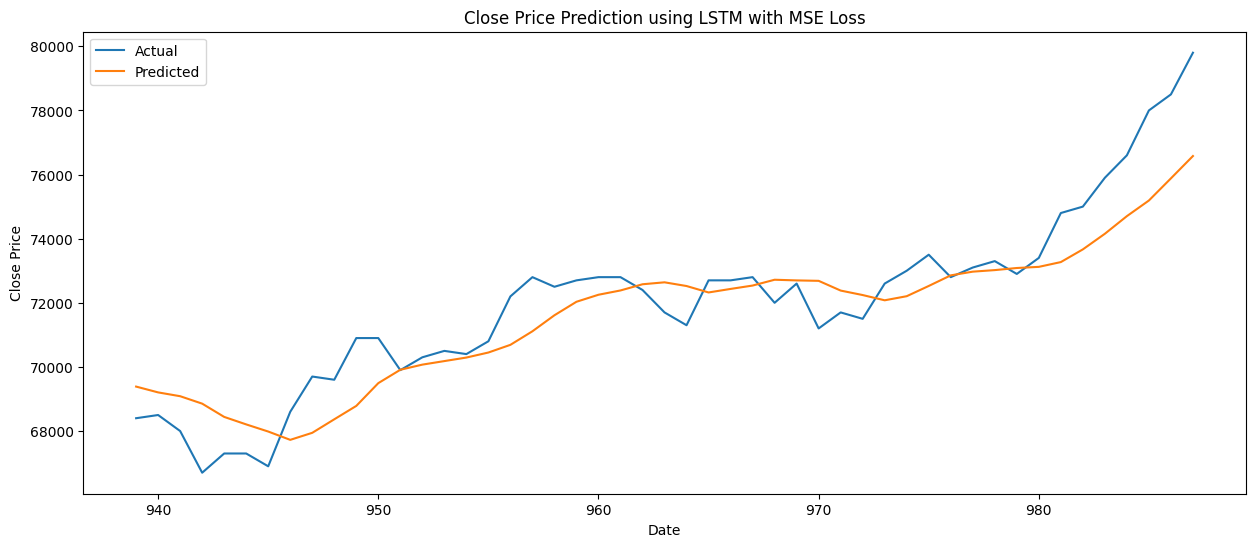

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']].values.reshape(-1, 1))

# 시퀀스 데이터 생성
sequence_length = 10  # 예측을 위한 과거 데이터의 수

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.title('Close Price Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Epoch 1/50
31/31 [==============================] - 1s 8ms/step - loss: 0.0985 - val_loss: 0.0011
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 7.3122e-04 - val_loss: 0.0013
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 6.5633e-04 - val_loss: 9.7293e-04
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 6.5649e-04 - val_loss: 0.0012
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 6.1963e-04 - val_loss: 6.5525e-04
Epoch 8/50
31/31 [==============================] - 0s 3ms/step - loss: 6.0683e-04 - val_loss: 7.5224e-04
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 6.0830e-04 - val_loss: 6.1884e-04
Epoch 10/50
31/31 [==============================] - 0s 3ms/step - loss: 6.447

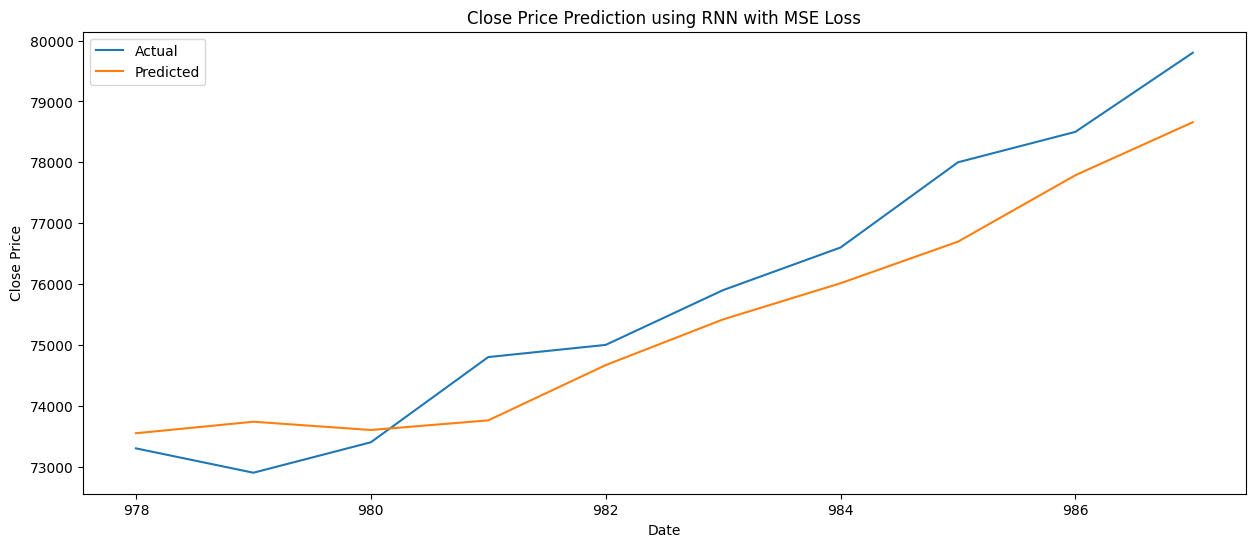

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 시퀀스 데이터 생성
sequence_length = 10  # 예측을 위한 과거 데이터의 수

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, shuffle=False)

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.title('Close Price Prediction using RNN with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#환율 데이터 예측

<Axes: xlabel='Date'>

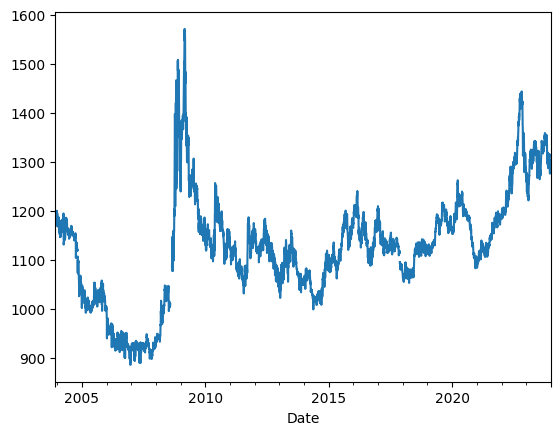

In [55]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

In [58]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,0.0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,0.0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,0.0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,0.0
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,0.0
...,...,...,...,...,...
2023-12-27,1293.920044,1295.760010,1290.000000,1293.920044,0.0
2023-12-28,1294.760010,1294.040039,1281.349976,1294.760010,0.0
2023-12-29,1277.839966,1301.920044,1259.520020,1277.839966,0.0


In [59]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']].values.reshape(-1, 1))

scaled_data

array([[0.45525181],
       [0.45028624],
       [0.44663511],
       ...,
       [0.57126994],
       [0.59418451],
       [0.60389654]])

In [63]:
print(np.isnan(df[['Close']]).any())
df = df.fillna(0)


Close    True
dtype: bool


In [64]:
print(np.isnan(df[['Close']]).any())

Close    False
dtype: bool


Epoch 1/200
156/156 [==============================] - 2s 5ms/step - loss: 0.0710 - val_loss: 1.6941e-04
Epoch 2/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 1.3418e-04
Epoch 3/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 1.1297e-04
Epoch 4/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 9.6005e-05
Epoch 5/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 1.2461e-04
Epoch 6/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 9.8243e-05
Epoch 7/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 9.8695e-05
Epoch 8/200
156/156 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 1.9726e-04
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 9.6005e-05
Mean Squared Error: 9.600539488019422e-05
9/9 [==============================]

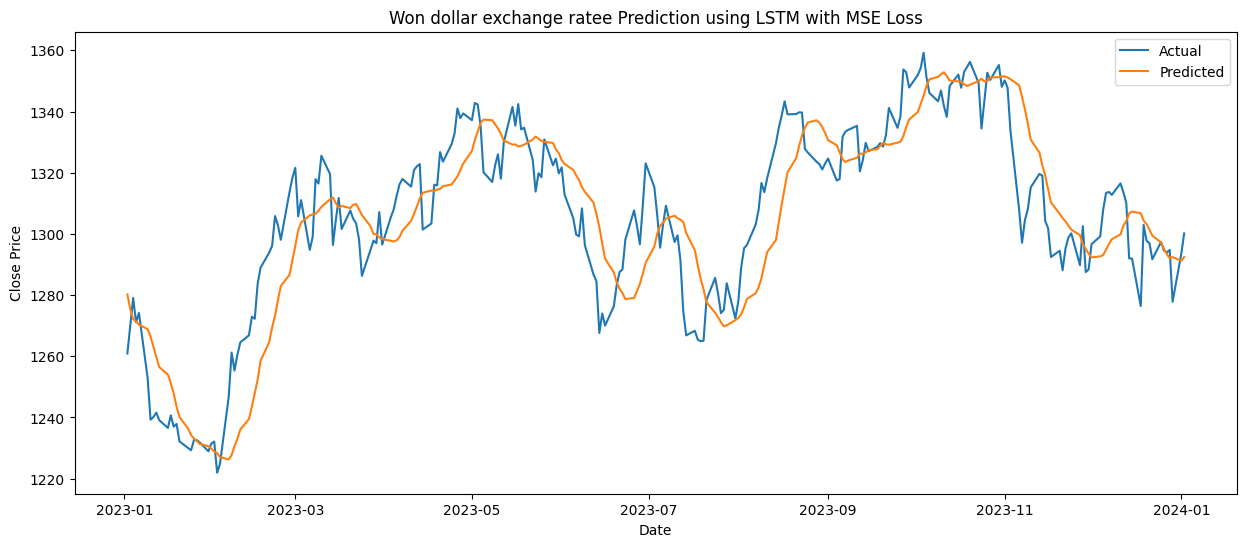

In [67]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']].values.reshape(-1, 1))

scaled_data

# 시퀀스 데이터 생성
sequence_length = 10  # 예측을 위한 과거 데이터의 수

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.title('Won dollar exchange ratee Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()